In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [10]:
os.getcwd() #to check the current working directory

'C:\\Users\\HP\\Downloads'

In [11]:
os.chdir('Downloads\\')
os.getcwd()

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Downloads\\'

In [12]:
df=pd.read_csv('Train.csv')#Loading the data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df.describe() #Summary for the data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
df.columns #Gerting the cloumns name

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
df.info() #Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
display (df.apply(lambda x: len(x.unique()))) #Dispaly the unique value for each column

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [17]:
df.shape #To get the shape of the data

(8523, 12)

In [18]:
df.isnull().sum() #Checking for null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
#For storing the columns which have categrical data in a list
c=[]   
for i in df.dtypes.index:
    if(df.dtypes[i]=='object'):
        c.append(i)
print(c)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [24]:
#Removing the columns which are not in use
c.remove('Item_Identifier')
c.remove('Outlet_Identifier')
print(c)

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [25]:
(df['Item_Fat_Content'].unique()) #Displaying the unique value in Item_Fat_Content

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
#Displaying the unique Values in category columns
for i in c:
    print(i,len(df[i].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [27]:
#finding unique value in each column
for col in c:
    print(col)
    print(df[col].value_counts())
    print()
    print ('-' *50)


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

--------------------------------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

--------------------------------------------------
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

--------------------------------------------------
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: 

In [28]:
#Displaying the missing values in Item_Weight column 
m_IW = df['Item_Weight'].isnull()
print(m_IW)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool


In [29]:
print(df['Item_Weight'].isnull().sum()) #Missing value count in Item_Weight

1463


In [30]:
IW_null=df[df['Item_Weight'].isna()] #Display all NULL values in Item_Weight
display(IW_null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [31]:
IW_null['Item_Identifier'].value_counts() #NULL Records by Item Identifier column 


FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: Item_Identifier, Length: 1142, dtype: int64

In [32]:
#Finding the mean for the column Item Weight group by Item Identifier 
IW_mean=df.pivot_table(values = "Item_Weight", index = 'Item_Identifier',aggfunc='mean')
display(IW_mean)


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [33]:
df['Item_Identifier'] #displaying Item_Identifier column

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [35]:
#Fill the missing values in Item_Weight by mean
for i, item in enumerate(df['Item_Identifier']):
    if m_IW[i]:
        if item in IW_mean:
            df['Item_Weight'][i] = IW_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])


In [36]:
#checking whether it has null values or not
result = df['Item_Weight'].isnull().sum()
display (result)

0

In [37]:
#Record count based on 'Outlet_Size'
result = df.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [38]:
8523-(932+2793+2388)

2410

In [39]:
display(df['Outlet_Size'].isnull().sum()) #NULL Record based on 'Outlet_Size

2410

In [40]:
Out_null=(df[df['Outlet_Size'].isna()]) #Displaying all null records
display(Out_null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [41]:
res=Out_null['Outlet_Type'].value_counts() #null records based on outlets
display(res)

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [47]:
#Group by based on Outlet_Type and Outlet_Size to find the most repeated value 
result= df.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [50]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [52]:
#Using mode to fill null values
Out_m= df['Outlet_Size'].isnull()
df.loc[Out_m, 'Outlet_Size'] = df.loc[Out_m, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [53]:
#Checking whether any null values are left
result = df['Outlet_Size'].isnull().sum()
display (result)

0

In [54]:
#Checking the group by count to see if the count increased
count = df.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (count)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [55]:
1083+932+930+3715+928+935

8523

In [56]:
display(sum(df['Item_Visibility']==0)) #Checking whether Item_Visibility is 0


526

In [57]:
#Replacing 0 with mean value
df.loc[:,'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)
display(sum(df['Item_Visibility']==0))

0

In [58]:
display(df['Item_Fat_Content'].unique()) #Checking distinct values 

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [59]:
#Consolidating similar Column Values 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
display(df['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [60]:
5517+3006

8523

In [61]:
#Creating new attributes with first two characters of item identifier column
df["New_Item_type"]=df['Item_Identifier'].apply(lambda i:i[:2])
display (df['New_Item_type'])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_type, Length: 8523, dtype: object

In [62]:
df['New_Item_type'].value_counts() #Displaying Number of records in each category 

FD    6125
NC    1599
DR     799
Name: New_Item_type, dtype: int64

In [63]:
#Mapping the values
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (df['New_Item_type'].value_counts())


Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_type, dtype: int64

In [64]:
display(df['Item_Fat_Content'].value_counts()) #Displaying distinct values in Item_Fat_Content

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [65]:
#Displaying the count based on New_Item_Type and Item_Fat_Content
result = df.groupby (['New_Item_type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [66]:
#Updating Item_Fat_Content  to ‘Non Edible’  
df.loc[df['New_Item_type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (df['Item_Fat_Content'].value_counts())
display (result)


Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [67]:
#Displaying the count based on New_Item_type and Item_Fat_Content
result=df.groupby(['New_Item_type' ,'Item_Fat_Content']).agg({'Outlet_Type':[np.size]}) #
display(result)

Outlet_Type
                                       size
New_Item_type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [68]:
#Displaying how many years the outlet is present Keeping Current year 2023
df['Outlet_Years'] = 2023 - df['Outlet_Establishment_Year']
print (df['Outlet_Years'])


0       24
1       14
2       24
3       25
4       36
        ..
8518    36
8519    21
8520    19
8521    14
8522    26
Name: Outlet_Years, Length: 8523, dtype: int64


In [69]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,36


# EDA

In [70]:
import seaborn as sns

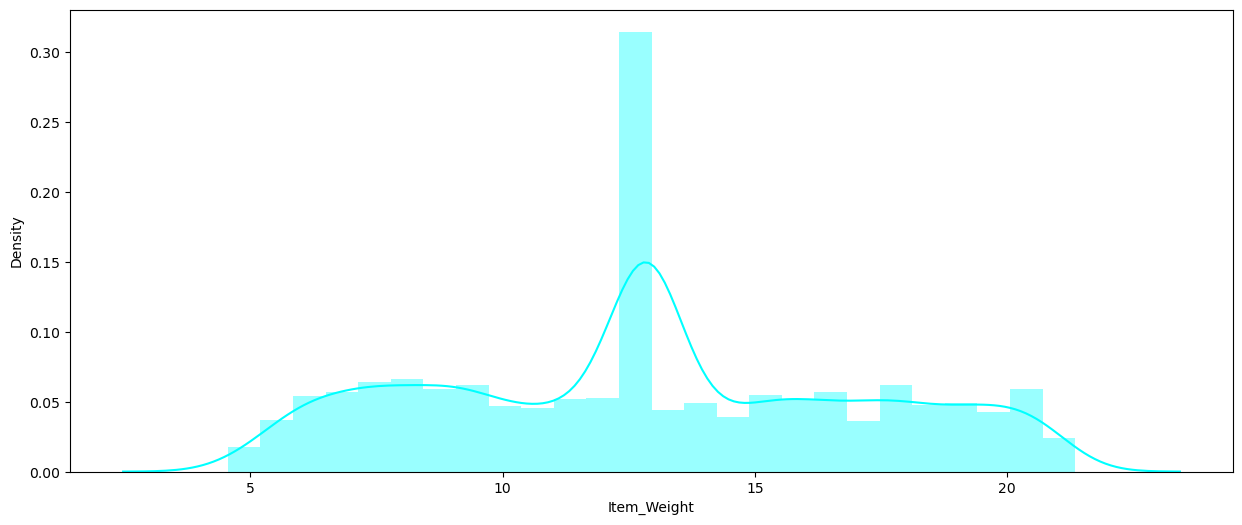

In [71]:
sns.distplot(df['Item_Weight'],color='cyan')
plt.show()


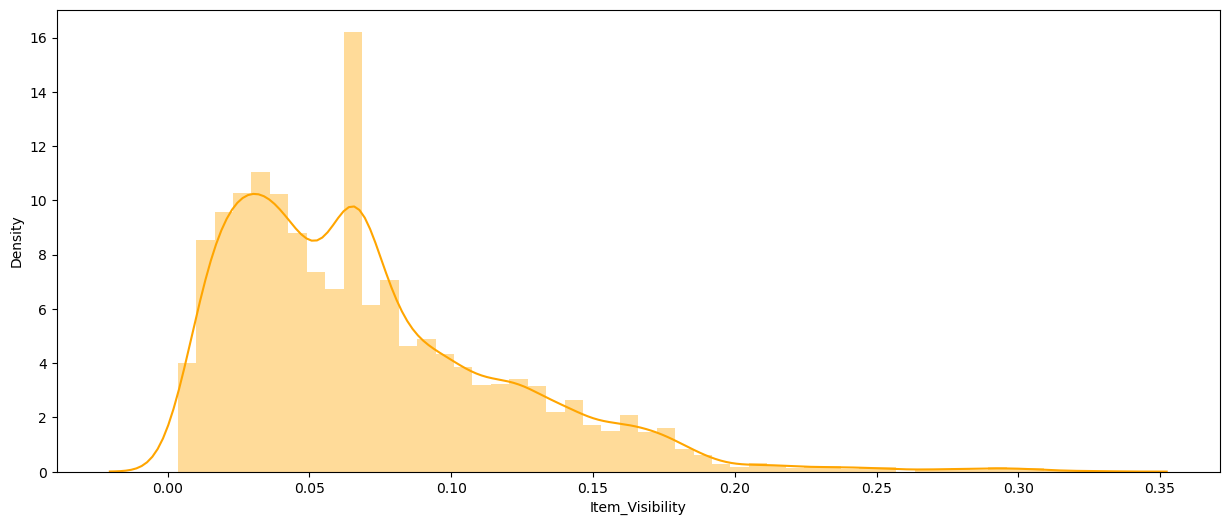

In [72]:
sns.distplot(df['Item_Visibility'],color='orange')
plt.show()

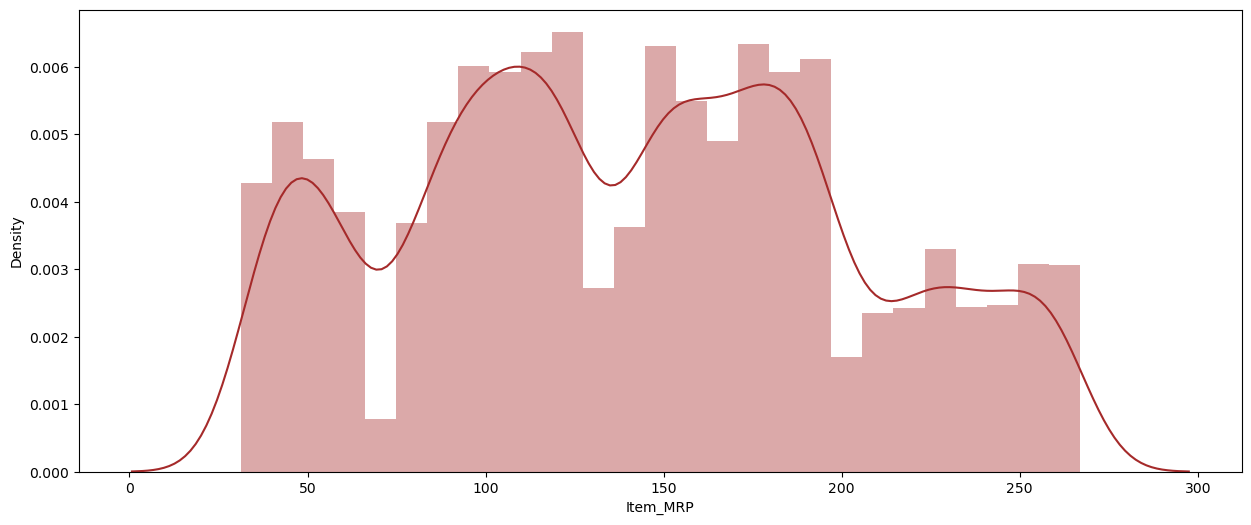

In [73]:
sns.distplot(df['Item_MRP'],color='brown')
plt.show()

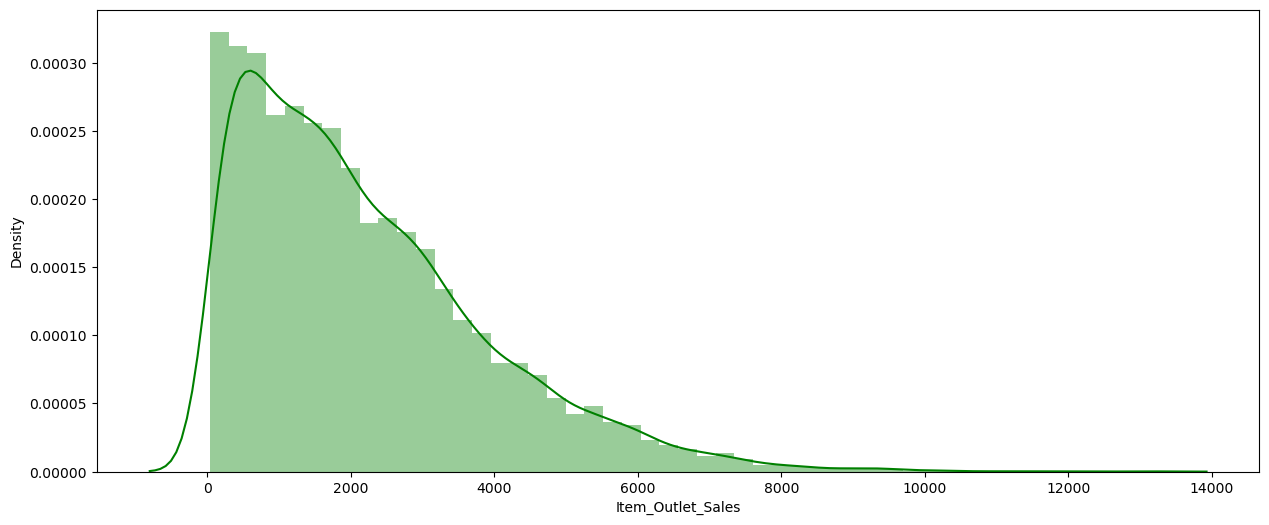

In [74]:
sns.distplot(df['Item_Outlet_Sales'],color='green')
plt.show()

In [75]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])
display (df['Item_Outlet_Sales'])


0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

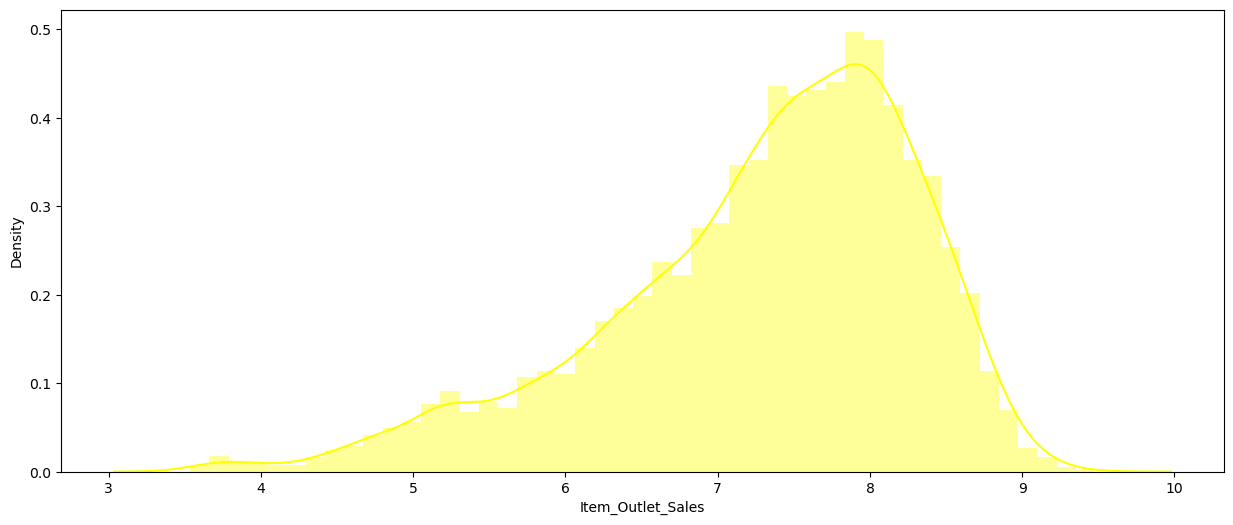

In [76]:
sns.distplot(df['Item_Outlet_Sales'],color='yellow')
plt.show()

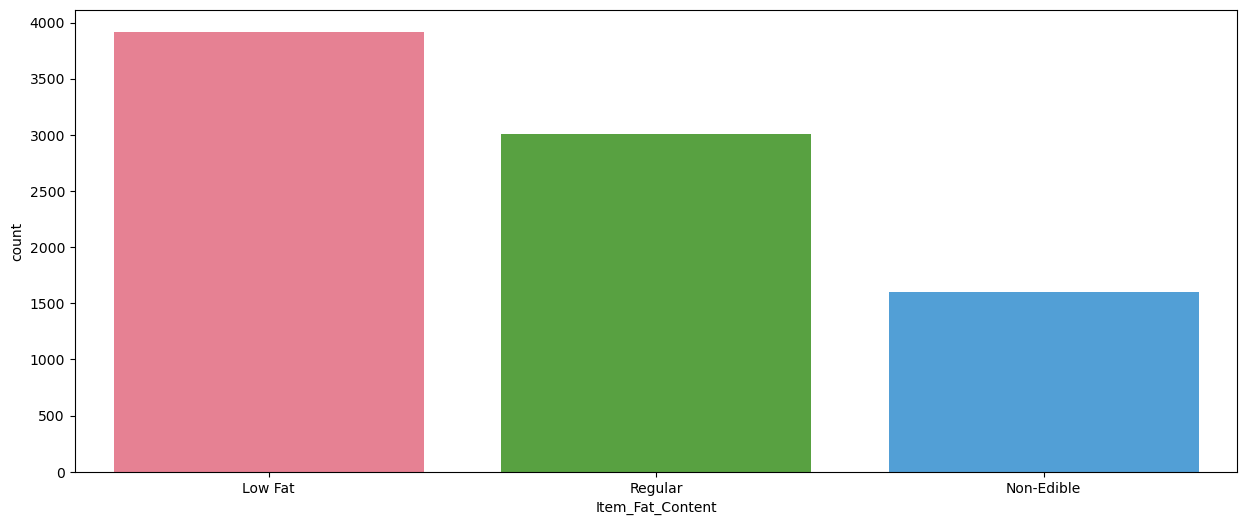

In [77]:
sns.countplot(df["Item_Fat_Content"],palette="husl")
plt.show()


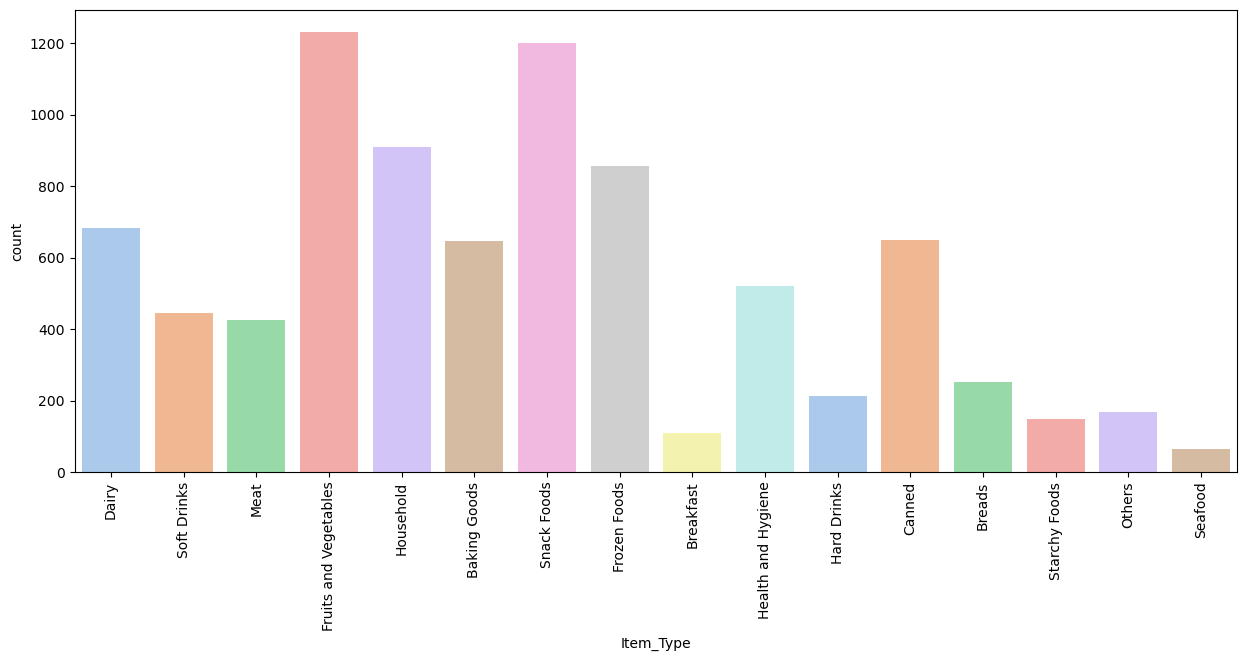

In [78]:
Item= list(df['Item_Type'].unique()) 
chart = sns.countplot(df["Item_Type"],  palette='pastel')
chart.set_xticklabels(labels=Item, rotation=90)
plt.show()


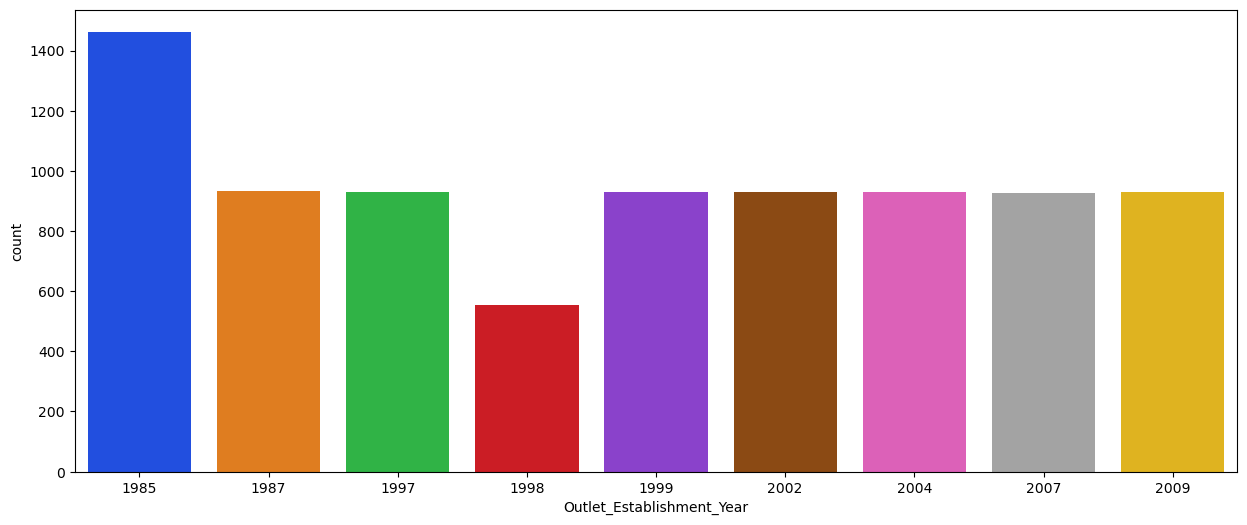

In [79]:
sns.countplot(df['Outlet_Establishment_Year'],palette='bright')
plt.show()

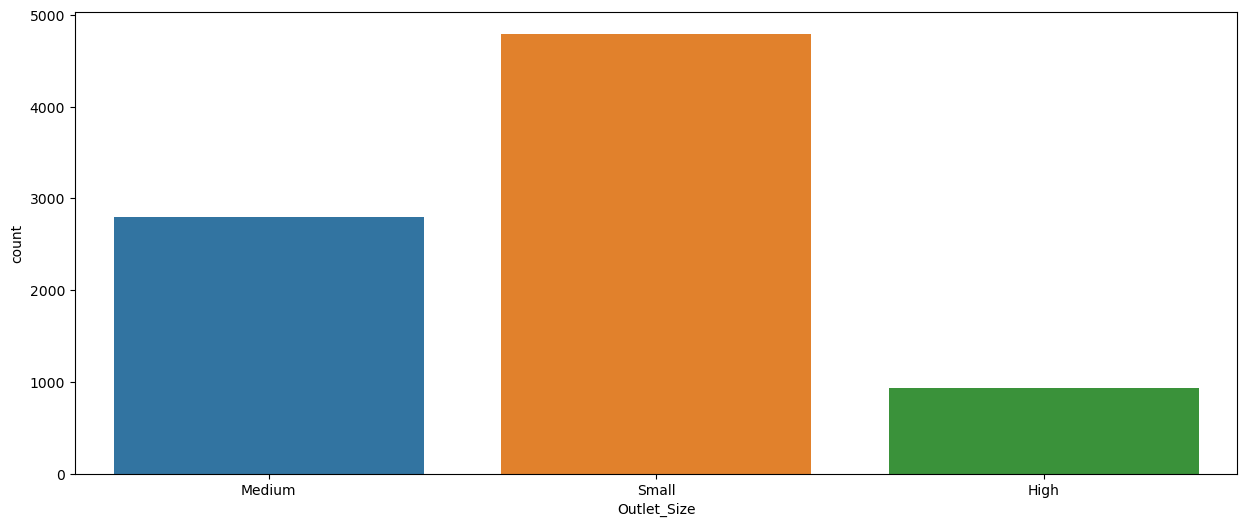

In [80]:
sns.countplot(df['Outlet_Size'])
plt.show()

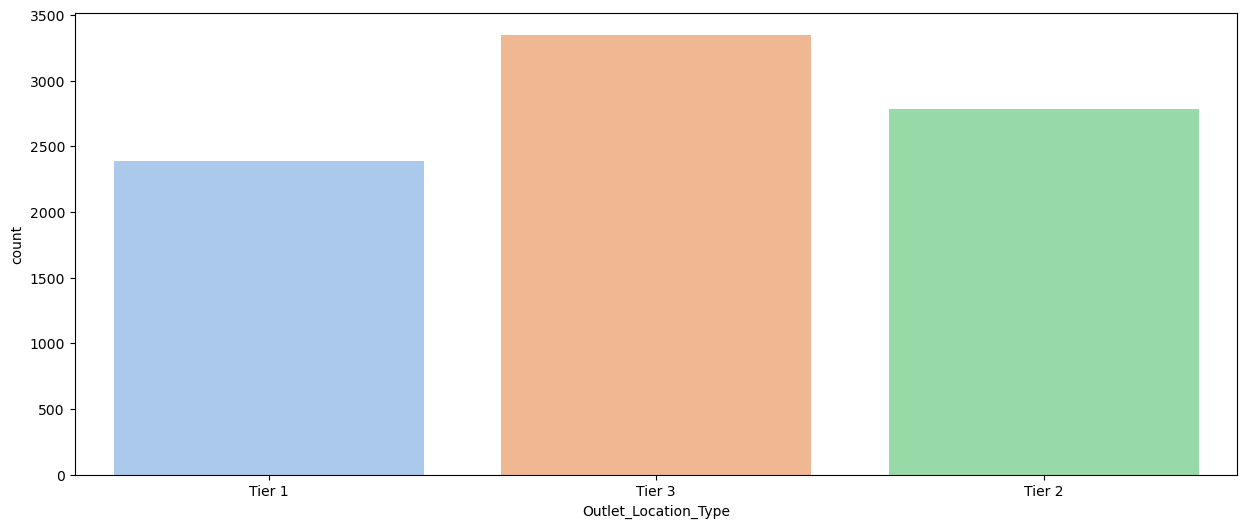

In [81]:
sns.countplot(df['Outlet_Location_Type'],palette='pastel')
plt.show()


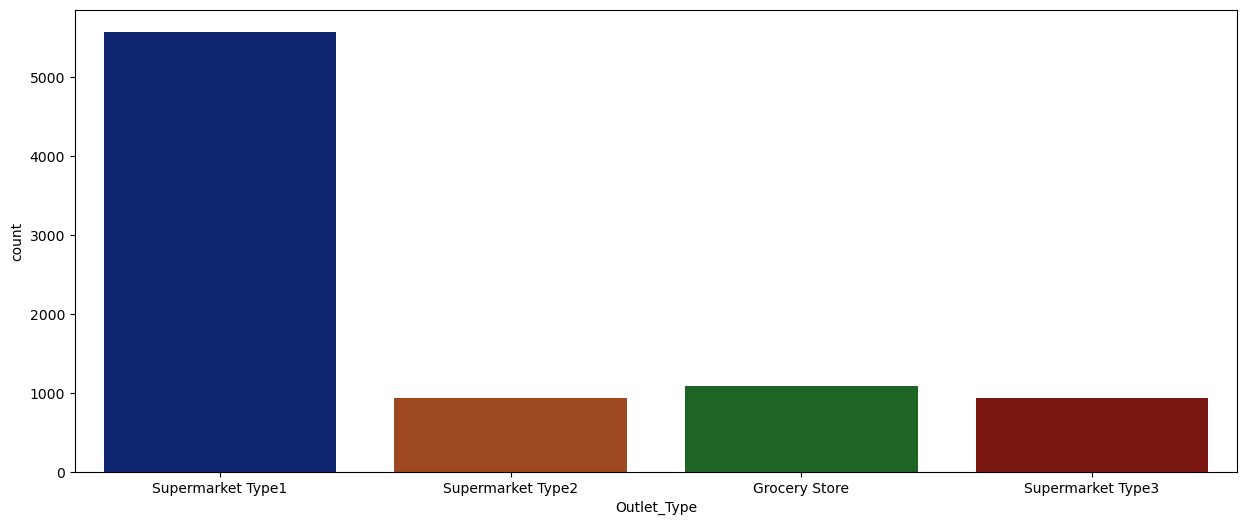

In [82]:
sns.countplot(df['Outlet_Type'],palette='dark')
plt.show()


In [83]:
corr = df.corr() #Corelation matrix
display (corr)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.008059,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.008059,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.008301,0.078355,-0.005020,-1.000000,-0.077032,1.000000


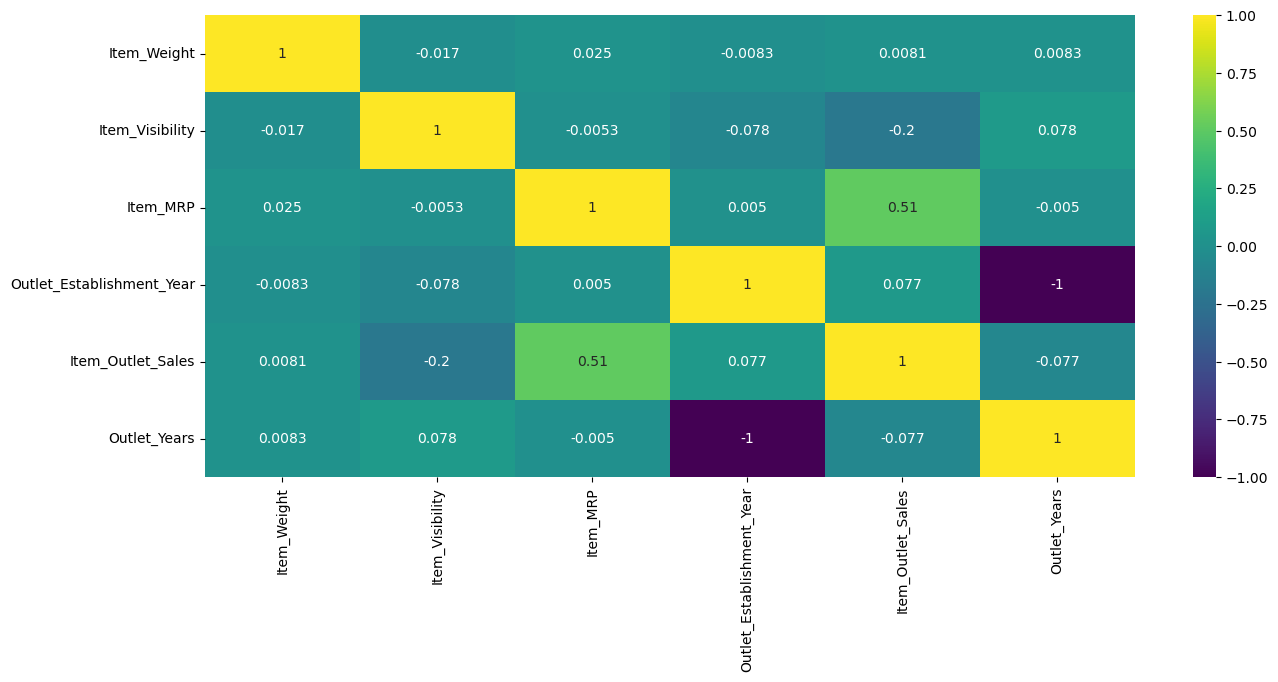

In [84]:
#Heatmap
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()


In [85]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,24
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,25
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,36


In [86]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet']

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [87]:
#Doing Label Encoding Of all the left colums
c = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_type']
for col in c:
    df[col] = le.fit_transform(df[col])
df.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,24,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,14,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,24,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,25,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,36,1


In [88]:
#Onehot encoding
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_type'])
display (df.head())


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_type_0,New_Item_type_1,New_Item_type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,24,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,14,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,24,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,25,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,36,1,...,0,0,1,0,1,0,0,0,0,1


In [89]:
#Dropping unused columns in input
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
X.head()


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_type_0,New_Item_type_1,New_Item_type_2
0,9.30,0.016047,4,249.8092,24,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,14,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,24,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,6,182.0950,25,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,9,53.8614,36,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [90]:
#Declaring Ouput
Y = df['Item_Outlet_Sales']
Y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [91]:
#Splitting Training and Testing
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.25,random_state=0)

In [92]:
print(X.shape,Y.shape) #X-shape and Y-shape

(8523, 22) (8523,)


In [93]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape) #Training and Testing Data Shape

(6392, 22) (2131, 22) (6392,) (2131,)


In [94]:
#Displaying all Scoring options 
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [96]:
#Defiing a fuction for model fitting and predicting
def train(model, x, y):
    # training the model
    model.fit(x, y)
    
    pred = model.predict(x)
    # perform cross-validation
    cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, x, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    print ('Accuracy for full Data')
    print('R2_Score:', r2_score(y,pred))
    print ()


Model Report
Scoring - neg_mean_squared_error
[-0.28097203 -0.28745765 -0.28058427 -0.29320541 -0.27602453]
ABS Average of - neg_mean_squared_error 0.2836487759667732

R2 Score 
[0.71447868 0.71907249 0.72343479 0.7230548  0.73084795]
Average R2 Score  0.7221777408936927

Accuracy for full Data
R2_Score: 0.7234448990493327

Outlet_Location_Type_2   -8.693978e+12
Outlet_Location_Type_1   -8.693978e+12
Outlet_Location_Type_0   -8.693978e+12
Item_Fat_Content_1       -5.273376e+12
New_Item_type_0          -1.860504e+12
New_Item_type_1          -1.860504e+12
Item_Fat_Content_0       -4.274160e+11
Item_Fat_Content_2       -4.274160e+11
Item_Visibility          -1.959866e-01
Outlet_Years             -8.759804e-02
Item_Weight              -1.829052e-03
Item_Type                 1.023524e-03
Item_MRP                  8.248134e-03
Outlet                    7.718540e-02
New_Item_type_2           2.985455e+12
Outlet_Size_1             1.991471e+13
Outlet_Size_2             1.991471e+13
Outlet_Size

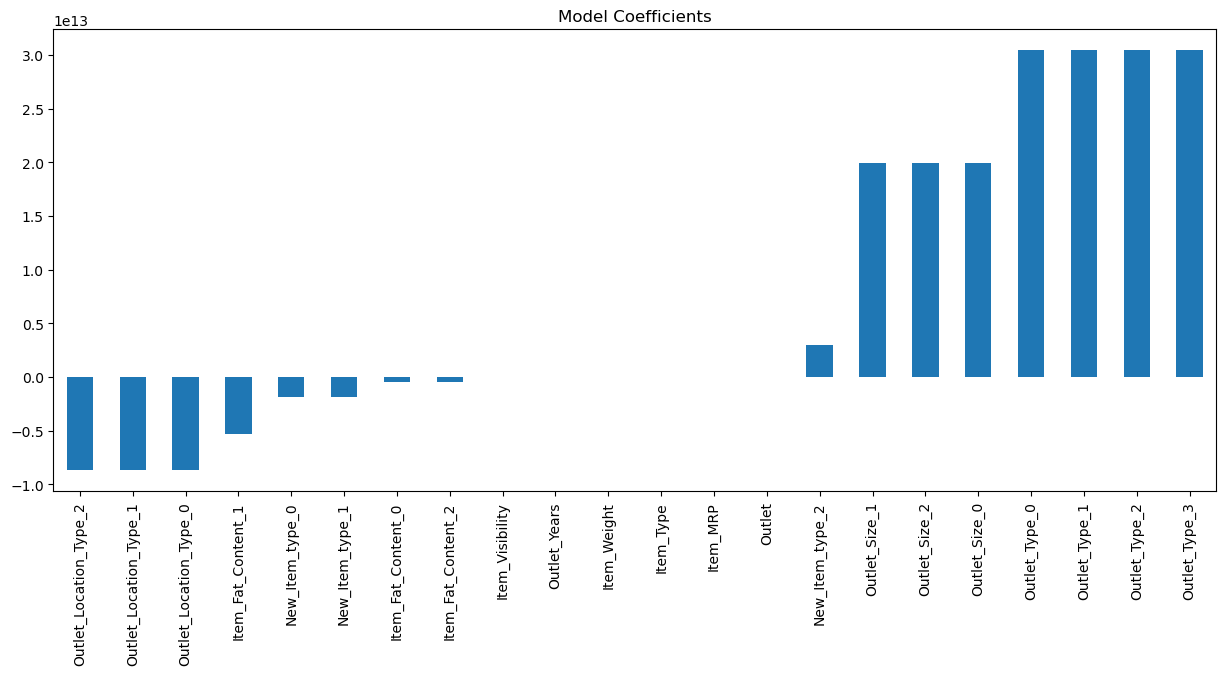

In [97]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, train_x, train_y)
coef = pd.Series(model.coef_, X.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.41611679 -0.40949131 -0.42389129 -0.44826675 -0.41195062]
ABS Average of - neg_mean_squared_error 0.4219433524968587

R2 Score 
[0.57714575 0.59981105 0.58218048 0.57659265 0.59830616]
Average R2 Score  0.5868072161433171

Accuracy for full Data
R2_Score: 0.5882103399810199



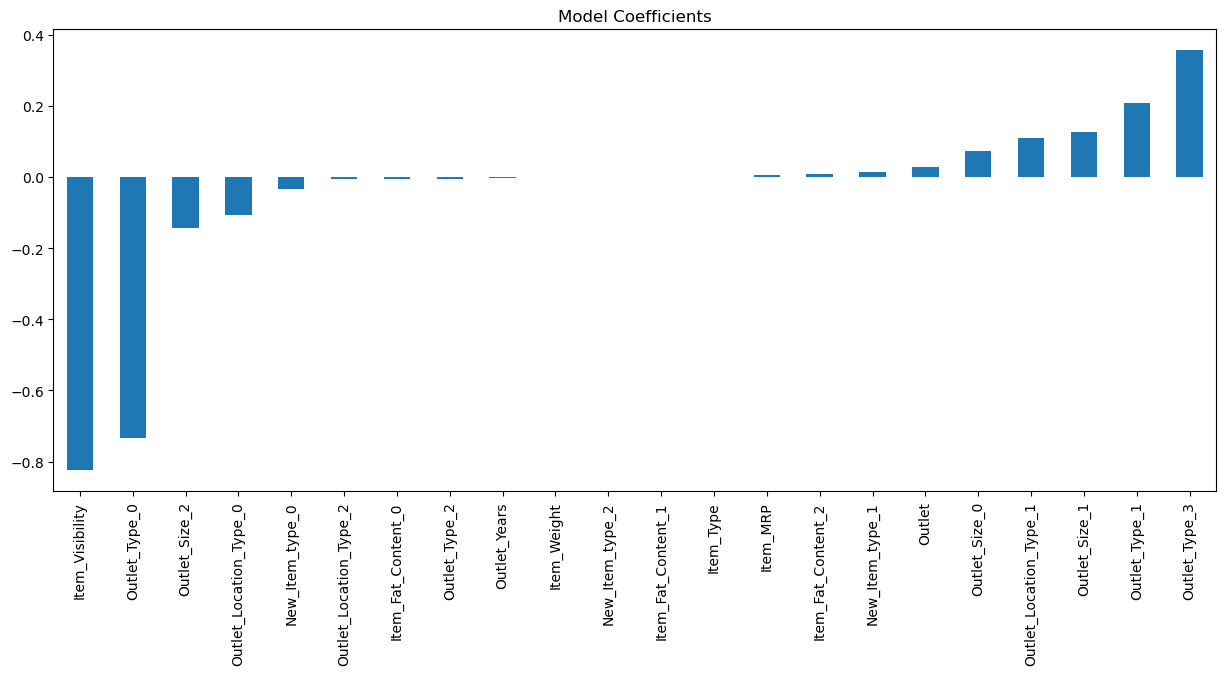

In [98]:
#Ridge Model
model = Ridge(normalize=True)
train(model, train_x, train_y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.73437004 -0.77032522 -0.7499469  -0.7390957  -0.78017043]
ABS Average of - neg_mean_squared_error 0.7547816602065307

R2 Score 
[0.25373957 0.24717415 0.26079525 0.30189211 0.23925432]
Average R2 Score  0.2605710792120338

Accuracy for full Data
R2_Score: 0.26226818351493786



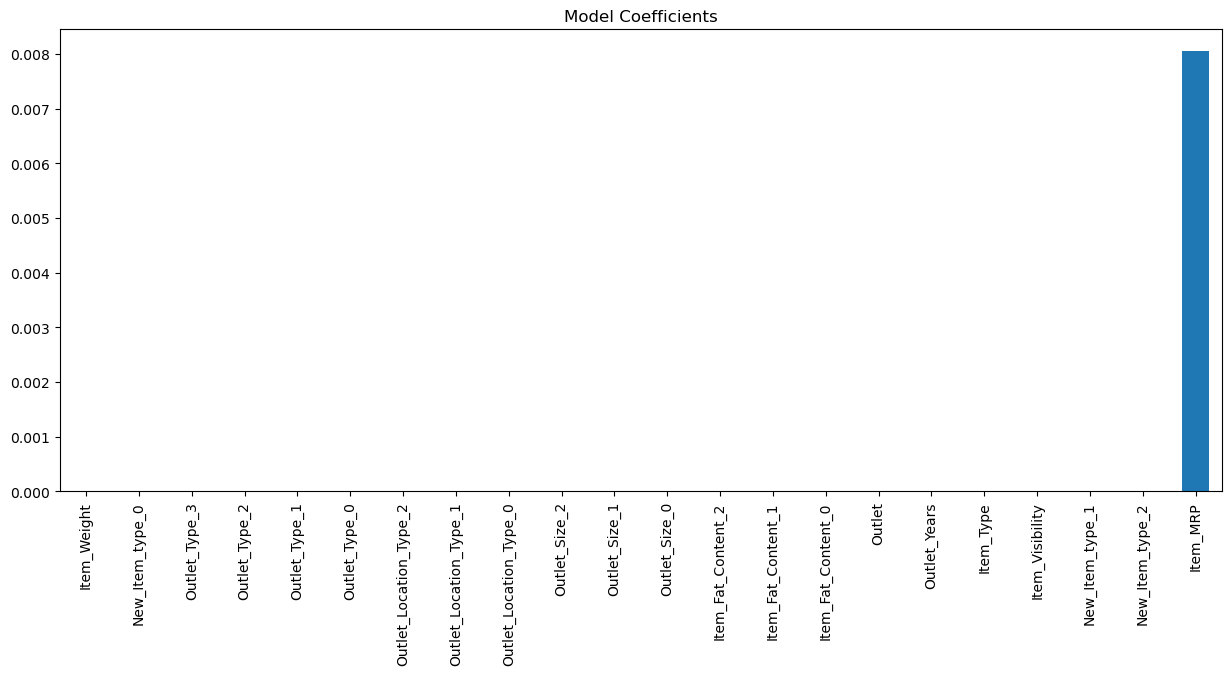

In [99]:
#Lasso Model
model = Lasso()
train(model, train_x, train_y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.55973591 -0.54646386 -0.55042167 -0.53970566 -0.49910446]
ABS Average of - neg_mean_squared_error 0.5390863121398928

R2 Score 
[0.41006547 0.48295374 0.452573   0.49971573 0.51291144]
Average R2 Score  0.47164387530751817

Accuracy for full Data
R2_Score: 1.0



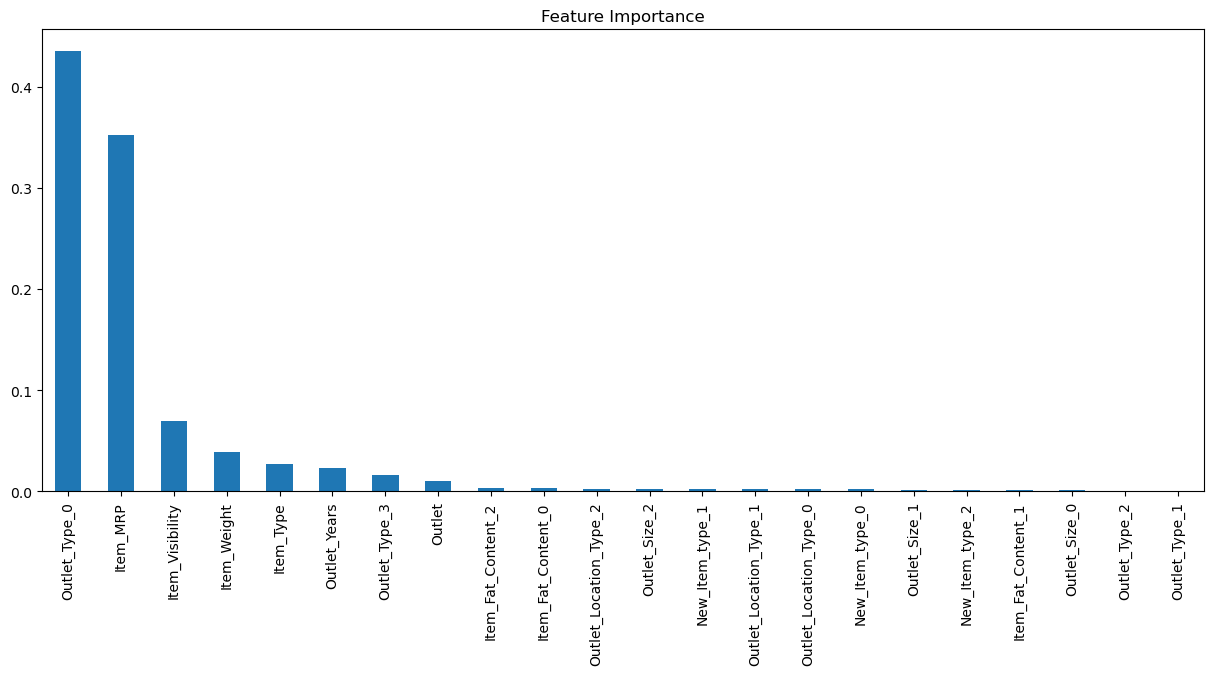

In [100]:
#Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,train_x, train_y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()



Model Report
Scoring - neg_mean_squared_error
[-0.30261744 -0.29297062 -0.29651197 -0.29557642 -0.29425816]
ABS Average of - neg_mean_squared_error 0.2963869230011375

R2 Score 
[0.69172518 0.71587271 0.70642299 0.71812737 0.71423851]
Average R2 Score  0.7092773524731149

Accuracy for full Data
R2_Score: 0.9597372832940976



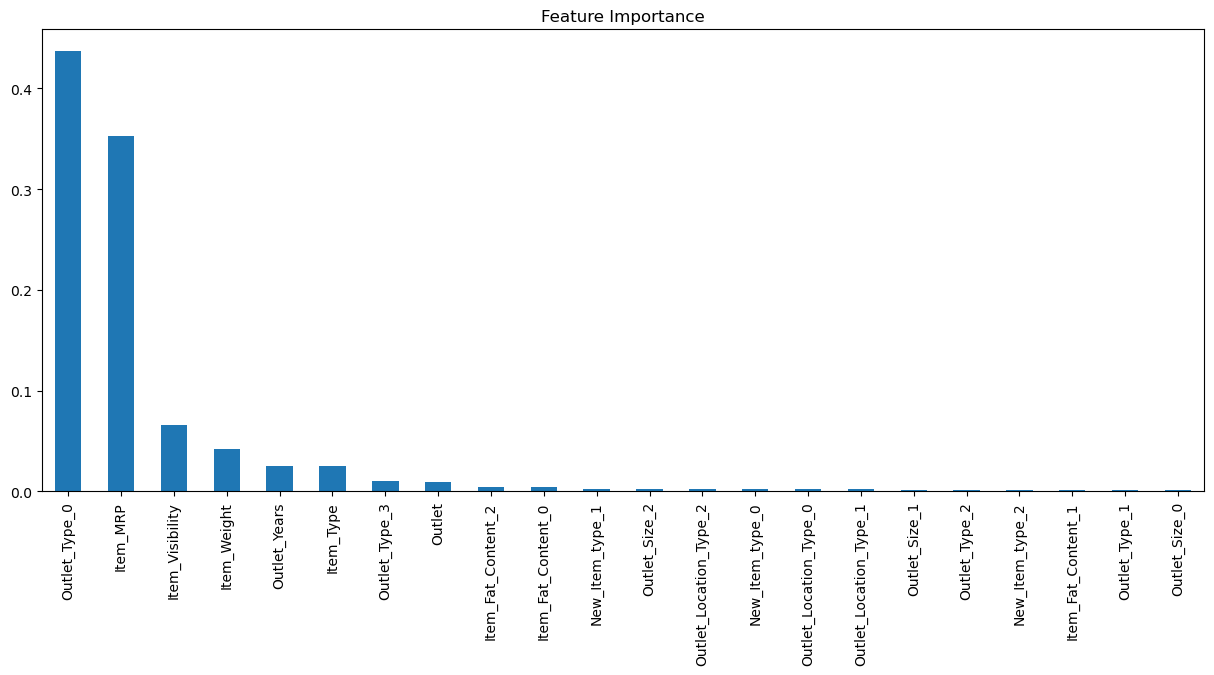

In [101]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, train_x, train_y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.32446583 -0.31442704 -0.31552945 -0.32263507 -0.32055892]
ABS Average of - neg_mean_squared_error 0.31952326148836363

R2 Score 
[0.67198127 0.69079327 0.68993647 0.6935062  0.68678301]
Average R2 Score  0.6866000452180829

Accuracy for full Data
R2_Score: 1.0



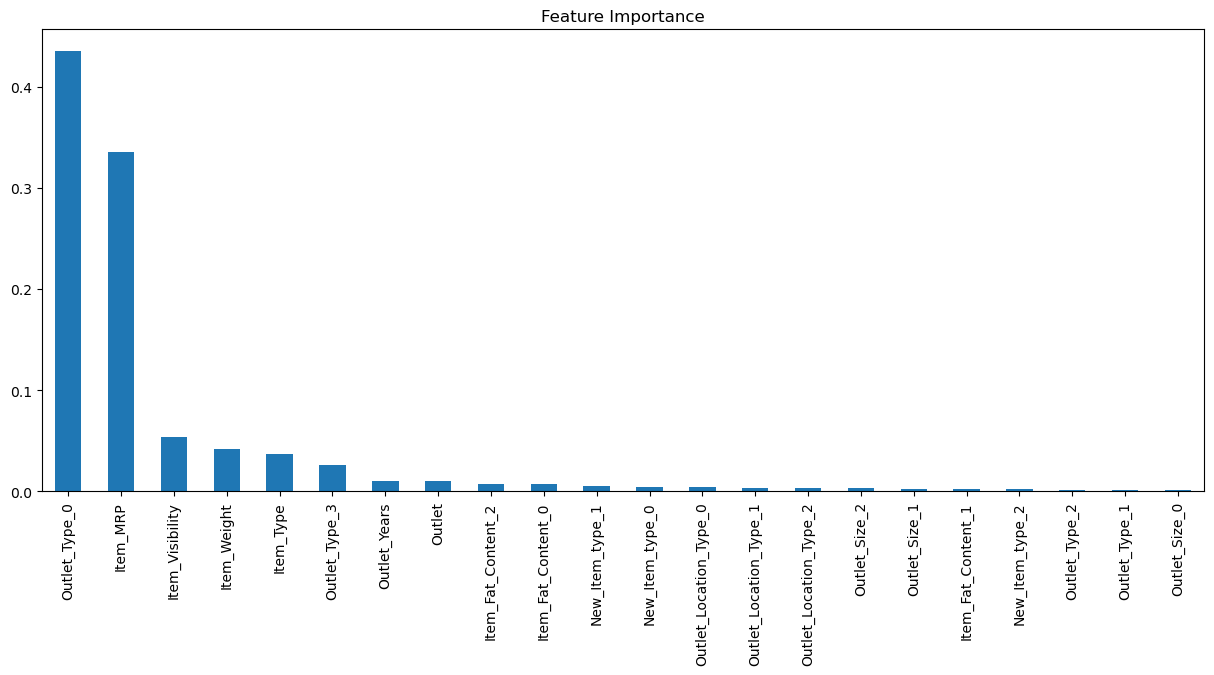

In [103]:
#ExtraTree Regressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, train_x, train_y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.27348482 -0.27452692 -0.27166304 -0.28334757 -0.28272203]
ABS Average of - neg_mean_squared_error 0.2771488776188277

R2 Score 
[0.72208711 0.73170947 0.73222823 0.73236595 0.7243172 ]
Average R2 Score  0.7285415926868547

Accuracy for full Data
R2_Score: 0.8112213735773411



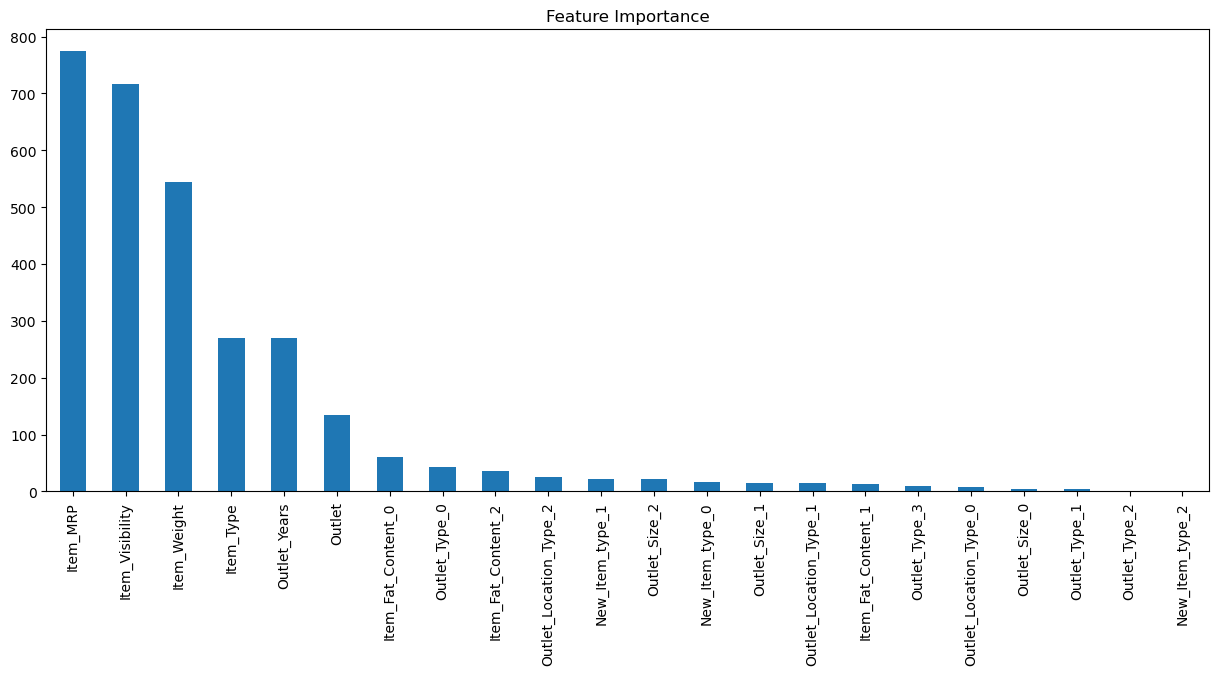

In [104]:
#LGBMRegressor
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, train_x, train_y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.29863937 -0.2946579  -0.29832054 -0.30213711 -0.31201029]
ABS Average of - neg_mean_squared_error 0.3011530402771404

R2 Score 
[0.69652528 0.71203581 0.70595257 0.71461842 0.69575817]
Average R2 Score  0.7049780488817255

Accuracy for full Data
R2_Score: 0.8953206202658841



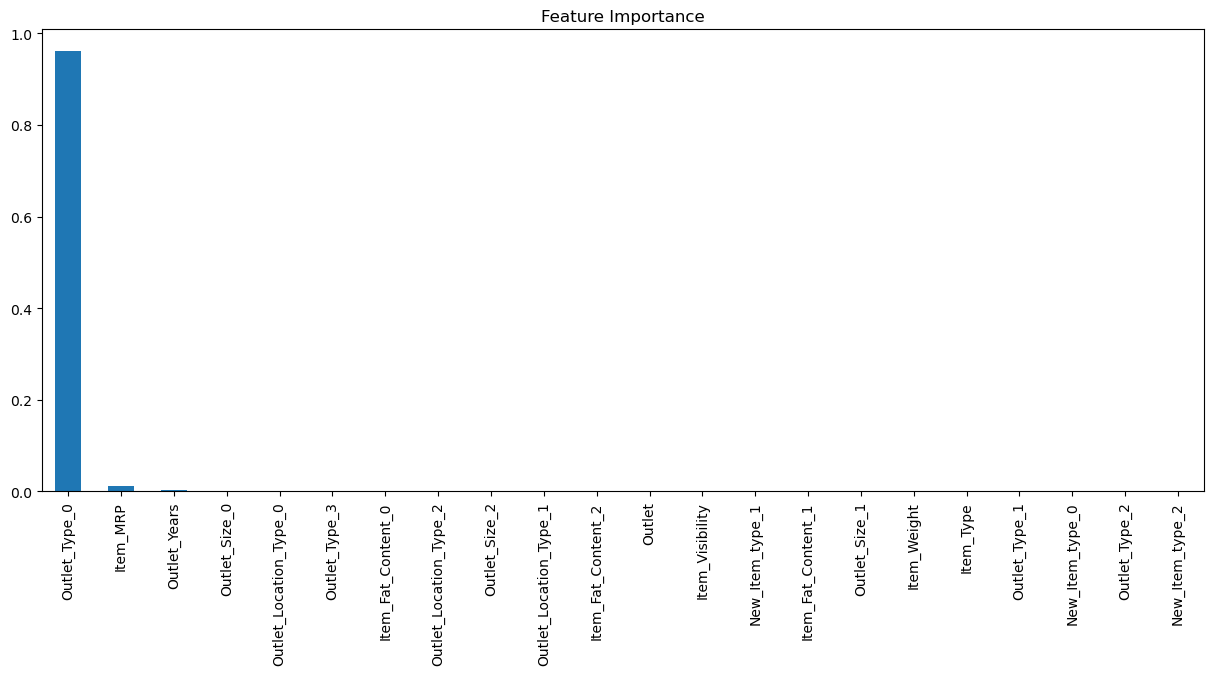

In [105]:
#XG Boost Regressor
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, train_x, train_y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


In [106]:
#Randomsized SearchCV
from sklearn.model_selection import RandomizedSearchCV
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [107]:
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                      n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
display (rf.fit(train_x, train_y))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.9s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [108]:
print(rf.best_params_)
print(rf.best_score_)
y_pre=rf.predict(test_x)
print (r2_score (test_y,y_pre))
print (y_pre)     


{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
-0.26898524944177526
0.7218908759334098
[7.71259197 7.50190355 7.52369696 ... 7.8576749  6.55095135 7.66283282]


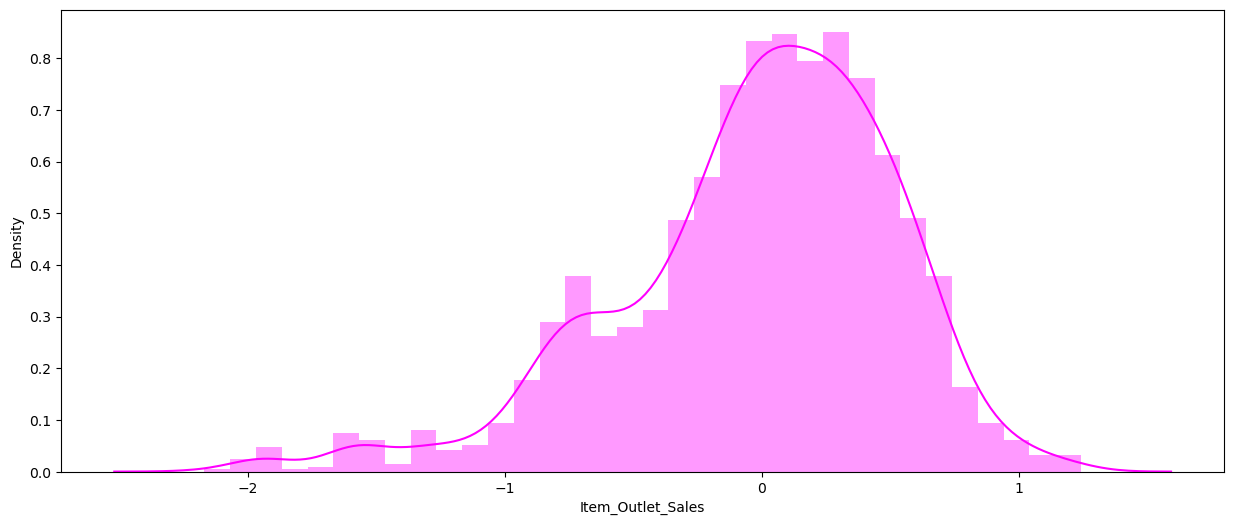

In [109]:
sns.distplot(test_y-y_pre,color='magenta')
plt.show()

In [110]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [112]:
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error',
                         n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,Y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.3s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsampl

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002115B308160>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002115B2FC340>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002115B2DFB50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002115B3084F0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002115B2DFC10>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [113]:
print(lgb.best_params_)
print(lgb.best_score_)
y_pre=lgb.predict(test_x)
display (r2_score (test_y,y_pre))
display (y_pre)


{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.2706799492098526


0.7333591257901757

array([7.76971638, 7.39781933, 7.50890595, ..., 7.85817532, 6.60124073,
       7.7091561 ])

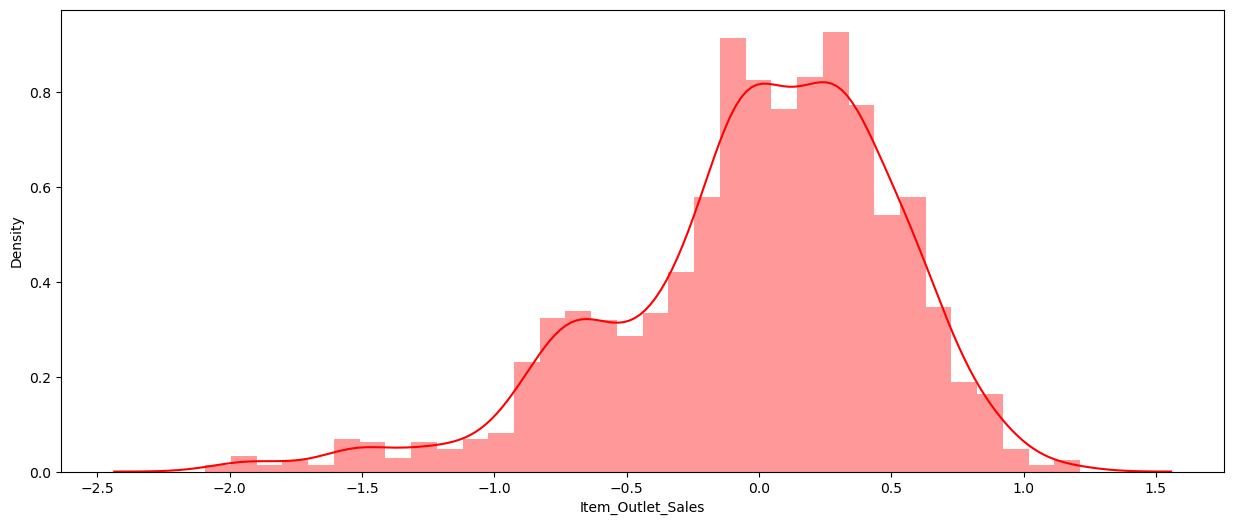

In [114]:
sns.distplot(test_y-y_pre,color='red')
plt.show()

In [116]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error',
                         n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X,Y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.6s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_f

In [117]:
print(xgb.best_params_)
print(xgb.best_score_)
y_pre=xgb.predict(test_x)
display (r2_score (test_y,y_pre))
display (y_pre)


{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.2704215862707118


0.7352411221294566

array([7.739384 , 7.4240503, 7.508462 , ..., 7.859723 , 6.5619926,
       7.7334094], dtype=float32)

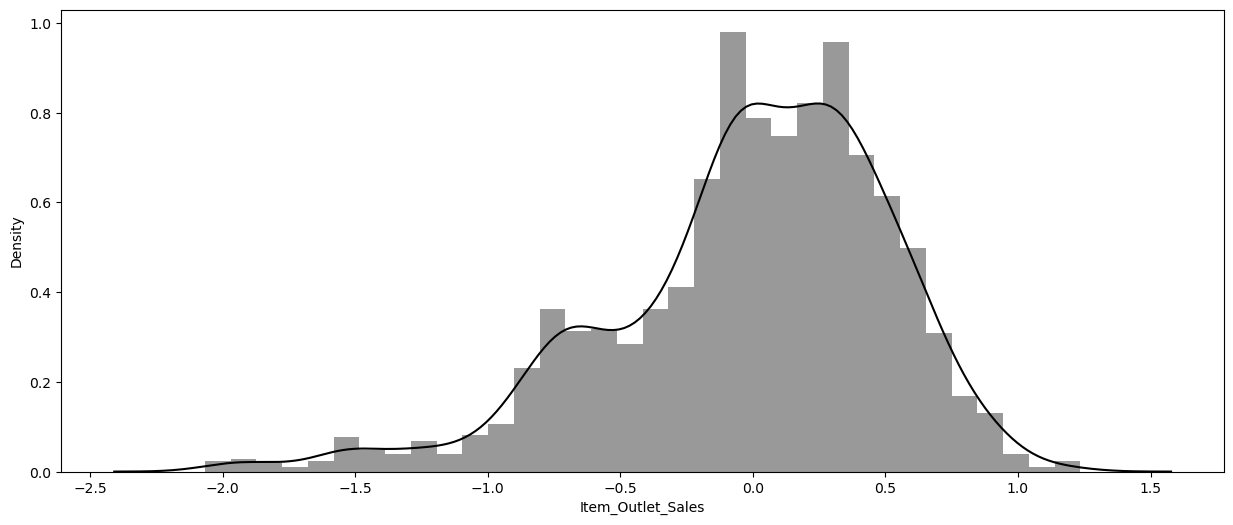

In [118]:
sns.distplot(test_y-y_pre,color='black')
plt.show()


In [119]:
import pickle
# Saving model to disk
pickle.dump(xgb, open('sales_pred.pkl','wb'))

In [120]:
model=pickle.load(open('sales_pred.pkl','rb'))
model.predict (train_x)

array([5.9211035, 7.9216156, 7.785136 , ..., 7.061492 , 7.511029 ,
       7.9563627], dtype=float32)